# Sample Name

How to use Template:
    i.  Change file Address
    ii. Set 'truncate' True if the initial data ranges from 0 to Bmax

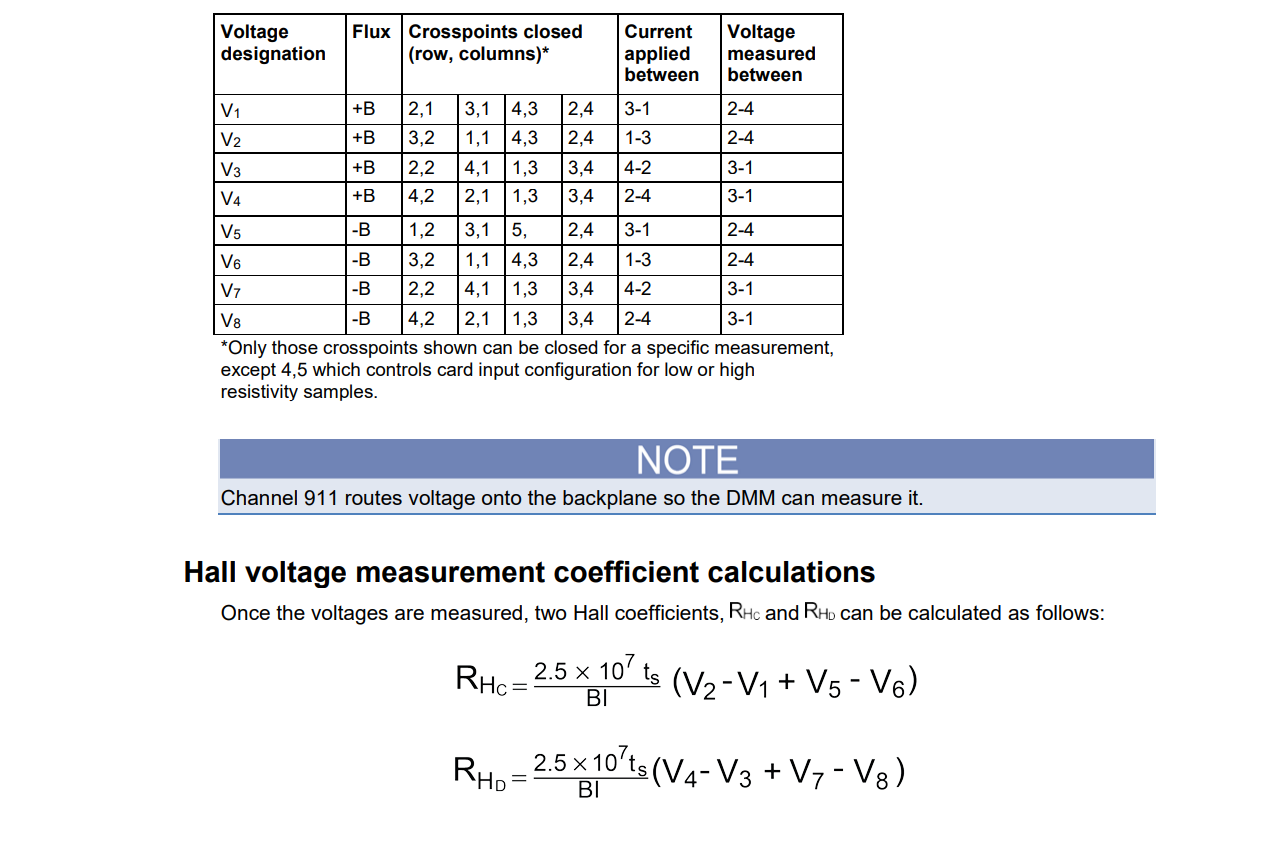

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os

In [2]:
truncate = False # True it contains data from O to Bmax
path = r"C:\Users\Admin\Desktop\Analysis\Data\A302\HALL"
filename = 'A304_SRO_NGO_1_5p_1_5n_100K.csv'
df = pd.read_csv(os.path.join(path, filename), names=["I", "B","T", "V1", "V2", "V3", "V4",'Rel_value','multiplier'])
df


,I,B,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.00005,20000.194824,100.096176,103.358993,-103.350028,-115.997704,115.979750,6.627000e-07,1000000.0
1,0.00005,19000.644824,100.007078,103.834765,-103.842000,-116.457078,116.496204,5.771000e-07,1000000.0
2,0.00005,18000.465918,99.999075,104.402052,-104.394445,-116.996442,117.034028,5.786000e-07,1000000.0
3,0.00005,17000.262793,99.999757,104.974512,-104.987544,-117.525821,117.573852,5.796000e-07,1000000.0
4,0.00005,16000.348877,99.999950,105.557070,-105.553075,-118.073769,118.116952,5.743000e-07,1000000.0
...,...,...,...,...,...,...,...,...,...
121,0.00005,16000.628320,99.999648,105.574895,-105.590800,-118.104031,118.128026,5.867000e-07,1000000.0
122,0.00005,17000.317188,100.000715,104.991150,-105.000363,-117.559983,117.587147,5.875000e-07,1000000.0
123,0.00005,18000.546484,100.000047,104.406415,-104.419851,-117.006359,117.057550,5.896000e-07,1000000.0
124,0.00005,19000.270996,99.999813,103.824543,-103.834490,-116.476194,116.503436,5.926000e-07,1000000.0


### Converting B to integer B

In [3]:
def round_fun(a):
    step = 500
    if a > 0 : q = int((a+1)/step)
    else : q = int((a-1)/step)
    return q*step

df['B_int'] = list(map(round_fun,df['B'].values))
df = df[['I', 'B','B_int', 'T', 'V1', 'V2', 'V3', 'V4', 'Rel_value', 'multiplier']].copy()

In [4]:

df.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.00005,20000.194824,20000,100.096176,103.358993,-103.350028,-115.997704,115.979750,6.627000e-07,1000000.0
1,0.00005,19000.644824,19000,100.007078,103.834765,-103.842000,-116.457078,116.496204,5.771000e-07,1000000.0
2,0.00005,18000.465918,18000,99.999075,104.402052,-104.394445,-116.996442,117.034028,5.786000e-07,1000000.0
3,0.00005,17000.262793,17000,99.999757,104.974512,-104.987544,-117.525821,117.573852,5.796000e-07,1000000.0
4,0.00005,16000.348877,16000,99.999950,105.557070,-105.553075,-118.073769,118.116952,5.743000e-07,1000000.0


In [5]:
data_temp = df.copy()
data_temp['R1'] = df['V1']/(df['multiplier']*df['I'])
data_temp['R2'] = df['V2']/(df['multiplier']*df['I'])
data_temp['R3'] = df['V3']/(df['multiplier']*df['I'])
data_temp['R4'] = df['V4']/(df['multiplier']*df['I'])

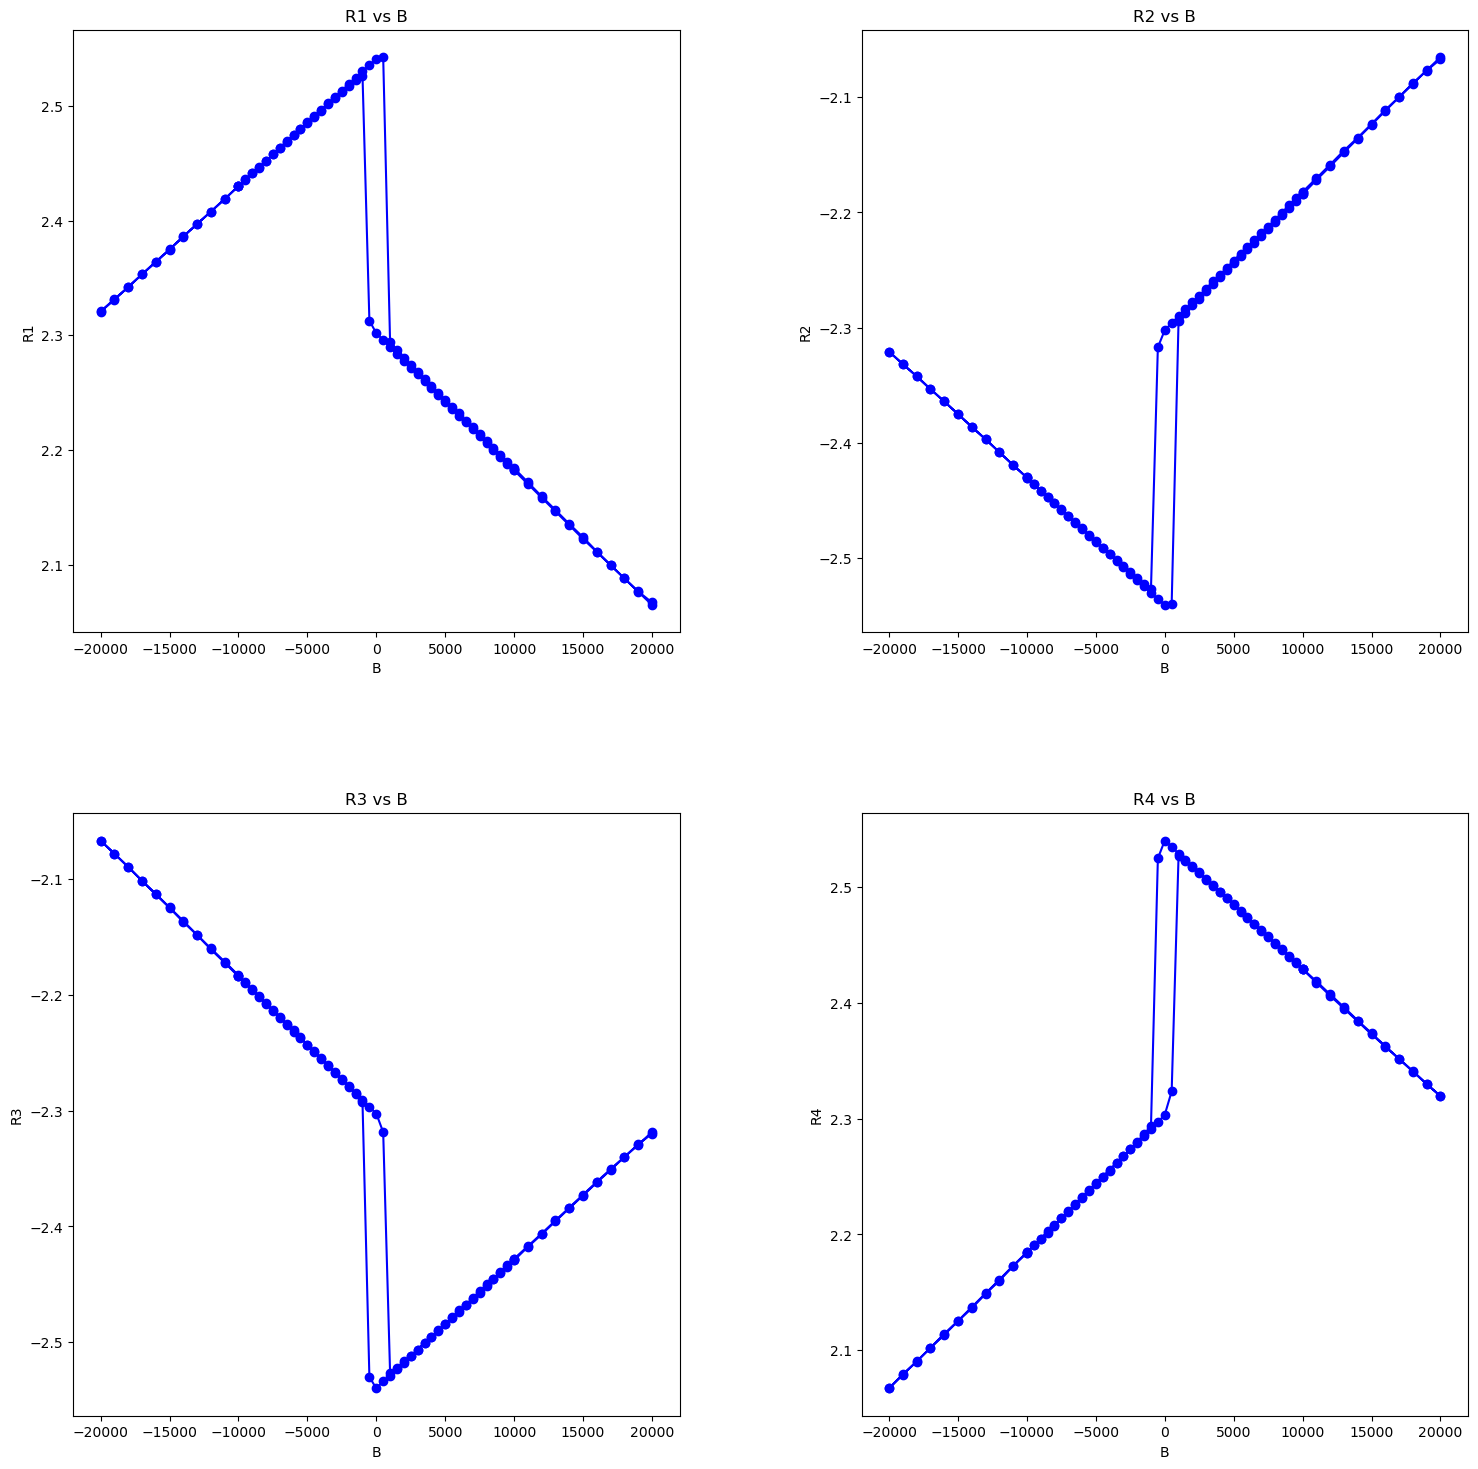

In [6]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()

### Truncating intial data (0 to 1 T)

In [7]:
if(truncate):
    B_max = max(df['B_int'])
    B_max_first_idx = 0
    for i in range(len(df)):
        if df.iloc[i].B_int == B_max:
            B_max_first_idx = i
            break
    print(B_max_first_idx)

    df = df.iloc[B_max_first_idx+1:].copy()
    df.reset_index(inplace = True, drop = True) # resetting index

In [8]:
data_temp = df.copy()
data_temp['R1'] = df['V1']/(df['multiplier']*df['I'])
data_temp['R2'] = df['V2']/(df['multiplier']*df['I'])
data_temp['R3'] = df['V3']/(df['multiplier']*df['I'])
data_temp['R4'] = df['V4']/(df['multiplier']*df['I'])

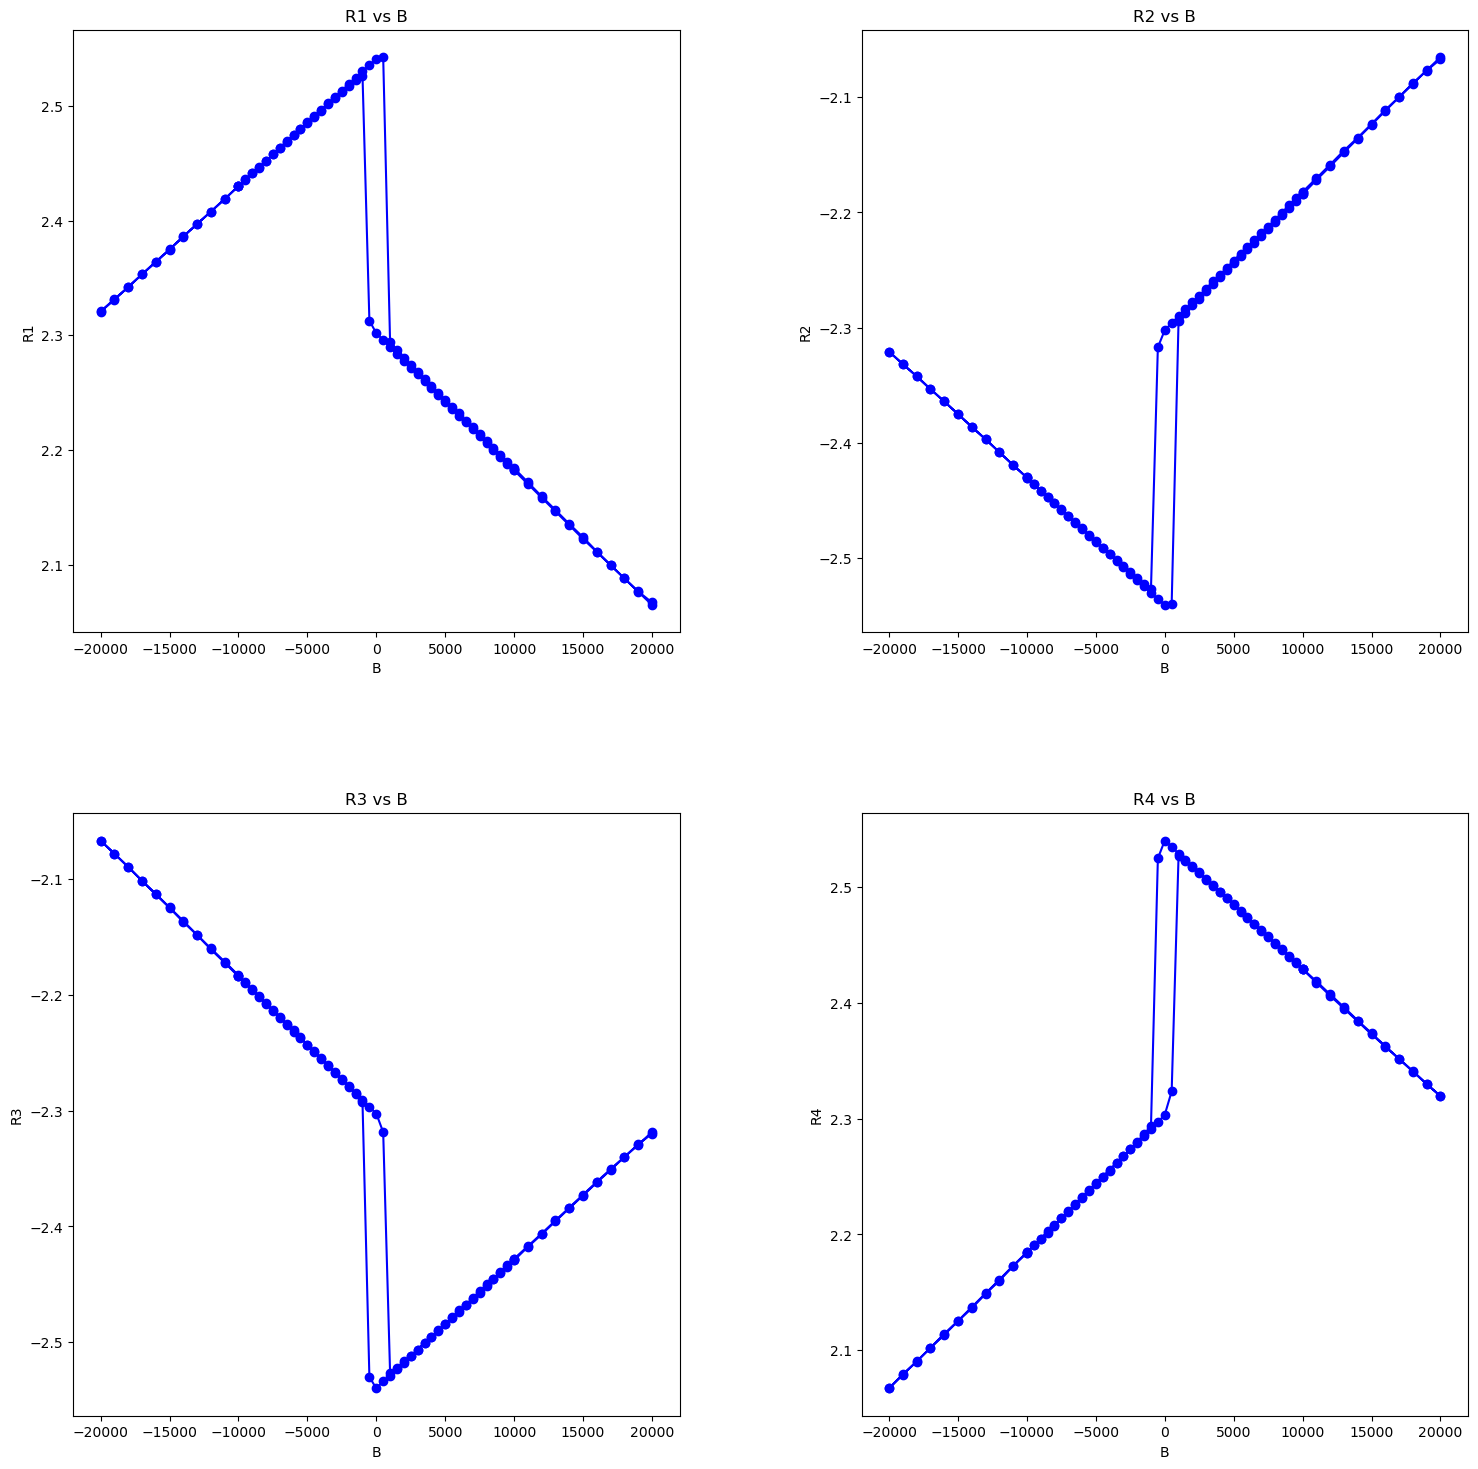

In [9]:
plt.figure(figsize=(18,18))
plt.subplot(2,2,1)
plt.plot(data_temp['B'],data_temp['R1'], 'bo-')
plt.title('R1 vs B')
plt.ylabel('R1')
plt.xlabel('B')
plt.subplot(2,2,2)
plt.plot(data_temp['B'],data_temp['R2'], 'bo-')
plt.title('R2 vs B')
plt.ylabel('R2')
plt.xlabel('B')
plt.subplot(2,2,3)
plt.plot(data_temp['B'],data_temp['R3'], 'bo-')
plt.title('R3 vs B')
plt.ylabel('R3')
plt.xlabel('B')
plt.subplot(2,2,4)
plt.plot(data_temp['B'],data_temp['R4'], 'bo-')
plt.title('R4 vs B')
plt.ylabel('R4')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0.3, wspace = 0.3)
plt.show()


## Spliting data into two subset (increasing and decreasing of magnetic field)

B_max to B_min --> Decreasing

B_min to B_max --> increasing


In [10]:
B_max = max(df['B_int'])
B_min = min(df['B_int'])
print(B_max, B_min)

20000 -20000


In [11]:
# finding index of first appearance of B_min
B_min_first_idx = 0
for i in range(len(df)):
    if df.iloc[i].B_int == B_min:
        B_min_first_idx = i
        break
B_min_first_idx

62

In [12]:
# now split it into two data set
df_dec = df.iloc[0:B_min_first_idx+1].copy()
df_inc = df.iloc[B_min_first_idx+1:].copy()

In [13]:
df_dec.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
0,0.00005,20000.194824,20000,100.096176,103.358993,-103.350028,-115.997704,115.979750,6.627000e-07,1000000.0
1,0.00005,19000.644824,19000,100.007078,103.834765,-103.842000,-116.457078,116.496204,5.771000e-07,1000000.0
2,0.00005,18000.465918,18000,99.999075,104.402052,-104.394445,-116.996442,117.034028,5.786000e-07,1000000.0
3,0.00005,17000.262793,17000,99.999757,104.974512,-104.987544,-117.525821,117.573852,5.796000e-07,1000000.0
4,0.00005,16000.348877,16000,99.999950,105.557070,-105.553075,-118.073769,118.116952,5.743000e-07,1000000.0


In [14]:
df_inc.head()

,I,B,B_int,T,V1,V2,V3,V4,Rel_value,multiplier
63,0.00005,-20000.359961,-20000,100.000675,116.023029,-116.038401,-103.344420,103.358607,5.800000e-07,1000000.0
64,0.00005,-19000.475879,-19000,100.000631,116.548528,-116.578869,-103.903618,103.957982,5.791000e-07,1000000.0
65,0.00005,-18000.556250,-18000,100.000154,117.095572,-117.102402,-104.465807,104.507321,5.814000e-07,1000000.0
66,0.00005,-17000.532910,-17000,100.000572,117.656036,-117.653665,-105.070364,105.101423,5.860000e-07,1000000.0
67,0.00005,-16000.584033,-16000,100.000457,118.179266,-118.200930,-105.638328,105.659785,6.016000e-07,1000000.0


In [15]:
df_dec.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates
df_inc.drop_duplicates(subset='B_int', keep='first', inplace=True) # remove duplicates

## Creating decreasing Field data

In [16]:
data_dec = pd.merge(df_dec.assign(key=1), df_inc.assign(key=1), on='key').drop('key', axis=1) # cross product

data_dec = data_dec[data_dec['B_int_x'] == -1*data_dec['B_int_y']] # selecting 
data_dec = data_dec[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data_dec.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data_dec.reset_index(inplace = True, drop = True) # resetting index
data_dec.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.00005,20000,100.096176,103.358993,-103.350028,-115.997704,115.979750,116.023029,-116.038401,-103.344420,103.358607,1000000.0
1,0.00005,19000,100.007078,103.834765,-103.842000,-116.457078,116.496204,116.548528,-116.578869,-103.903618,103.957982,1000000.0
2,0.00005,18000,99.999075,104.402052,-104.394445,-116.996442,117.034028,117.095572,-117.102402,-104.465807,104.507321,1000000.0
3,0.00005,17000,99.999757,104.974512,-104.987544,-117.525821,117.573852,117.656036,-117.653665,-105.070364,105.101423,1000000.0
4,0.00005,16000,99.999950,105.557070,-105.553075,-118.073769,118.116952,118.179266,-118.200930,-105.638328,105.659785,1000000.0


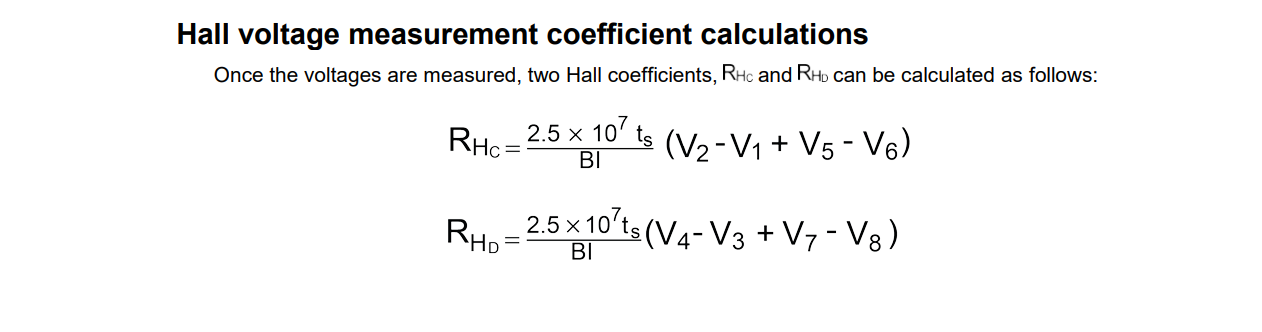
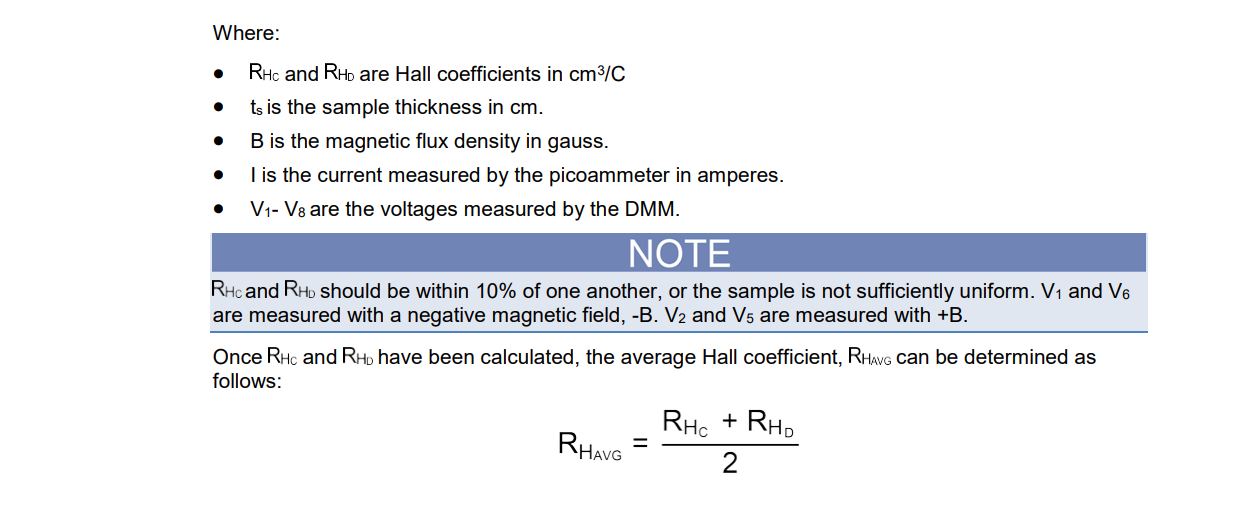

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [17]:
data_dec['RHc'] = (-data_dec['V2'] + data_dec['V1'] - data_dec['V5'] + data_dec['V6'])/(data_dec['I']*data_dec['multiplier'])
data_dec['RHd'] = (-data_dec['V4'] + data_dec['V3'] - data_dec['V7'] + data_dec['V8'])/(data_dec['I']*data_dec['multiplier'])
data_dec['R'] = (data_dec['RHc'] + data_dec['RHd'])/2

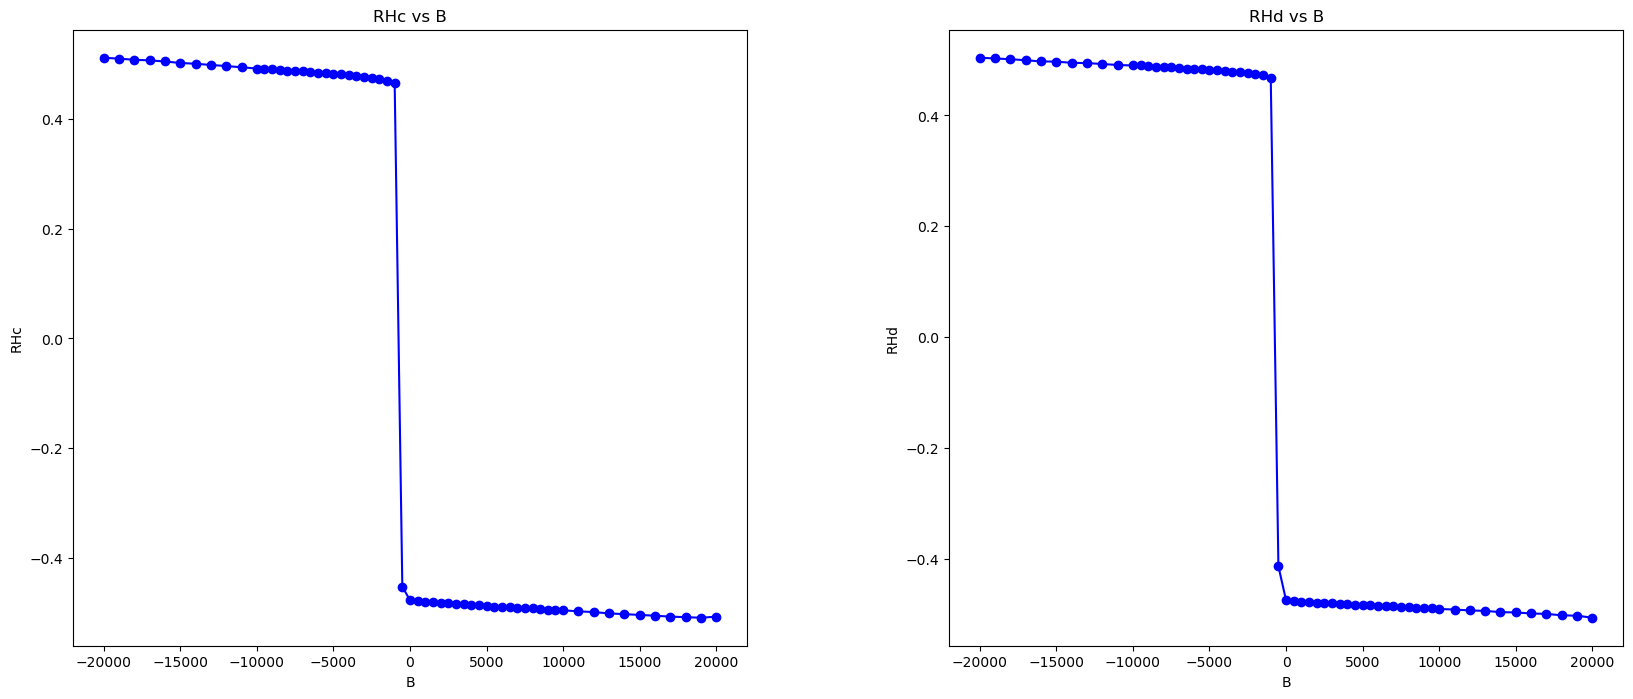

In [18]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data_dec['B'],data_dec['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data_dec['B'],data_dec['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

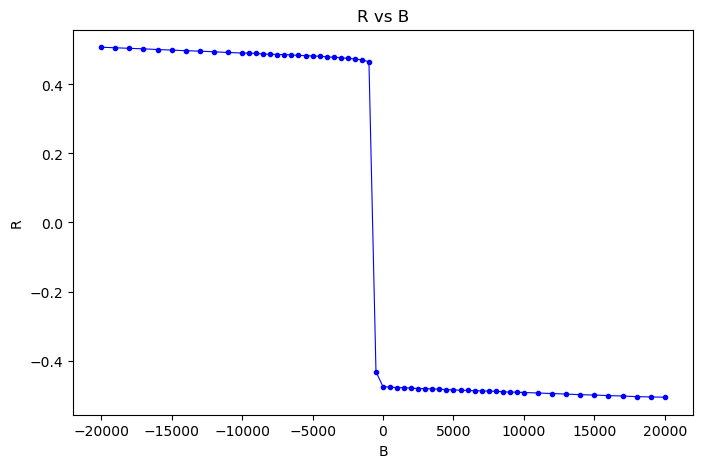

In [19]:
plt.figure(figsize=(8,5))
plt.plot(data_dec['B'],data_dec['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Creating Increasing Field data

In [20]:
data_inc = pd.merge(df_inc.assign(key=1), df_dec.assign(key=1), on='key').drop('key', axis=1) # cross product

data_inc = data_inc[data_inc['B_int_x'] == -1*data_inc['B_int_y']] # selecting 
data_inc = data_inc[['I_x','B_int_x','T_x','V1_x','V2_x','V3_x','V4_x','V1_y','V2_y','V3_y','V4_y','multiplier_x']].copy() # req coloumns

data_inc.rename({'I_x' : 'I', 'B_int_x' : 'B', 'T_x' : 'T', 'V1_x' : 'V1', 'V2_x' : 'V2', 'V3_x' : 'V3', 'V4_x' : 'V4', 'V1_y' : 'V5', 'V2_y' : 'V6', 'V3_y' : 'V7', 'V4_y' : 'V8', 'multiplier_x' : 'multiplier'}, axis=1, inplace=True)
data_inc.reset_index(inplace = True, drop = True) # resetting index
data_inc.head()

,I,B,T,V1,V2,V3,V4,V5,V6,V7,V8,multiplier
0,0.00005,-20000,100.000675,116.023029,-116.038401,-103.344420,103.358607,103.358993,-103.350028,-115.997704,115.979750,1000000.0
1,0.00005,-19000,100.000631,116.548528,-116.578869,-103.903618,103.957982,103.834765,-103.842000,-116.457078,116.496204,1000000.0
2,0.00005,-18000,100.000154,117.095572,-117.102402,-104.465807,104.507321,104.402052,-104.394445,-116.996442,117.034028,1000000.0
3,0.00005,-17000,100.000572,117.656036,-117.653665,-105.070364,105.101423,104.974512,-104.987544,-117.525821,117.573852,1000000.0
4,0.00005,-16000,100.000457,118.179266,-118.200930,-105.638328,105.659785,105.557070,-105.553075,-118.073769,118.116952,1000000.0


### Hall resistance calculation

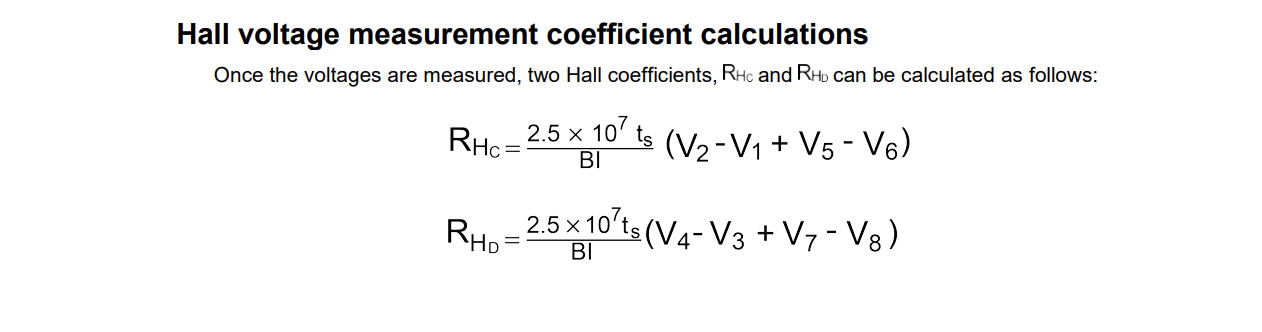

## Note : Here RHc & RHd we computed is Hall resistance, not Hall coefficients.

In [21]:
data_inc['RHc'] = (-data_inc['V2'] + data_inc['V1'] - data_inc['V5'] + data_inc['V6'])/(data_inc['I']*data_inc['multiplier'])
data_inc['RHd'] = (-data_inc['V4'] + data_inc['V3'] - data_inc['V7'] + data_inc['V8'])/(data_inc['I']*data_inc['multiplier'])

data_inc['R'] = (data_inc['RHc'] + data_inc['RHd'])/2

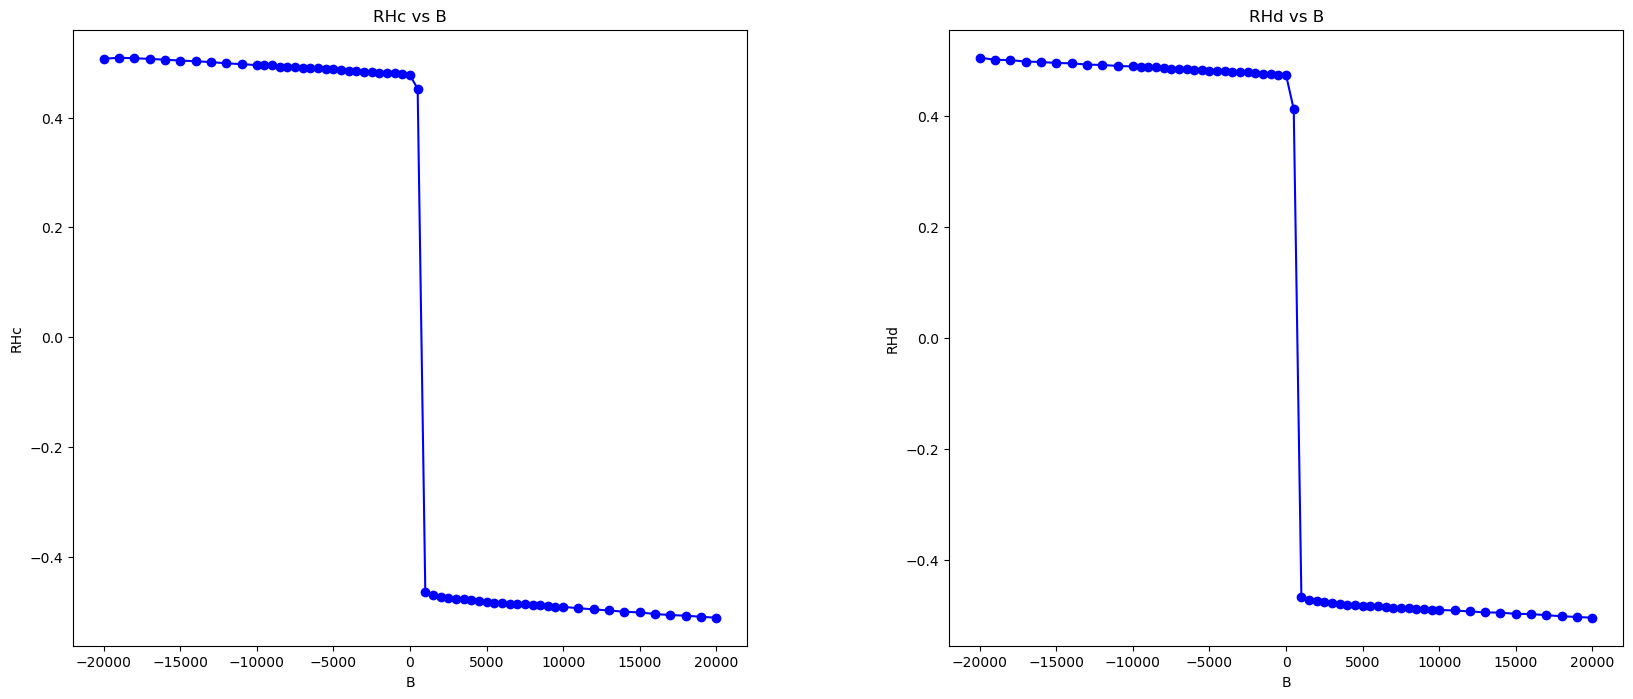

In [22]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.plot(data_inc['B'],data_inc['RHc'],'bo-')
plt.title('RHc vs B')
plt.ylabel('RHc')
plt.xlabel('B')
plt.subplot(1,2,2)
plt.plot(data_inc['B'],data_inc['RHd'],'bo-')
plt.title('RHd vs B')
plt.ylabel('RHd')
plt.xlabel('B')
plt.subplots_adjust(hspace = 0, wspace = 0.3)
plt.show()

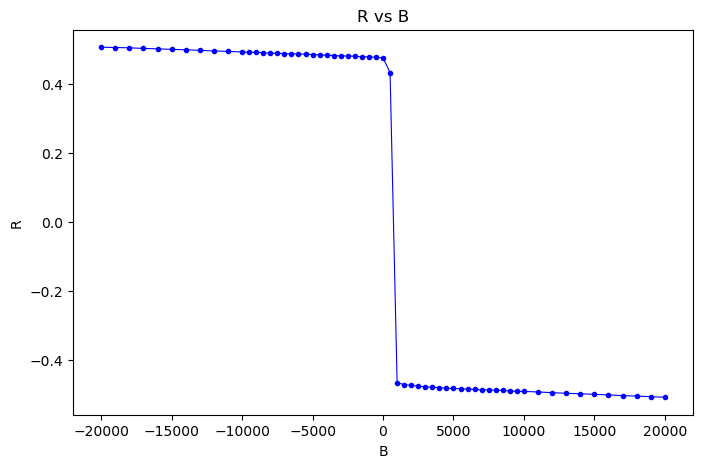

In [23]:
plt.figure(figsize=(8,5))
plt.plot(data_inc['B'],data_inc['R'],'bo-', linewidth=0.8, markersize=3)
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.show()

## Plotting on same graph

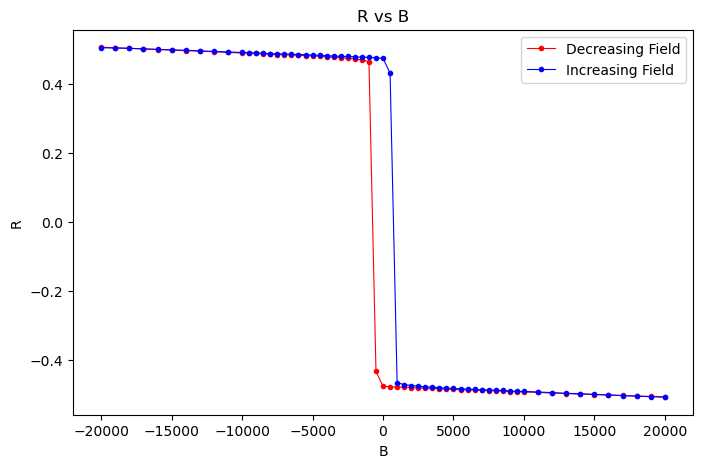

In [24]:
plt.figure(figsize=(8,5))
plt.plot(data_dec['B'], data_dec['R'], 'ro-', linewidth=0.8, markersize=3, label = 'Decreasing Field')
plt.plot(data_inc['B'],data_inc['R'],'bo-', linewidth=0.8, markersize=3, label = 'Increasing Field')
plt.title('R vs B')
plt.ylabel('R')
plt.xlabel('B')
plt.legend()
plt.show()

In [25]:
data = pd.concat([data_dec,data_inc])
data.reset_index(drop=True, inplace = True)
data.to_csv(f'{filename}')